In [284]:
import pandas as pd
import numpy as np
import requests

import folium # For rendering maps

# !conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # Acquiring latitude and longitude

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

print('Imported Libraries.')

Imported Libraries.


In [285]:
def get_new_york_data():
    url='https://cocl.us/new_york_dataset'
    resp=requests.get(url).json()
    # all data is present in features label
    features=resp['features']
    
    # define the dataframe columns
    column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
    # instantiate the dataframe
    new_york_data = pd.DataFrame(columns=column_names)
    
    for data in features:
        borough = data['properties']['borough'] 
        neighborhood_name = data['properties']['name']
        
        neighborhood_latlon = data['geometry']['coordinates']
        neighborhood_lat = neighborhood_latlon[1]
        neighborhood_lon = neighborhood_latlon[0]
    
        new_york_data = new_york_data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    
    return new_york_data

In [286]:
df_ny = get_new_york_data()

In [287]:
df_ny.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [288]:
df_ny.shape

(306, 4)

*Let's check if we can obtain data from a sample neighborhood.*

In [289]:
df_ny[df_ny['Neighborhood']=='Financial District']

,Borough,Neighborhood,Latitude,Longitude
128,Manhattan,Financial District,40.707107,-74.010665


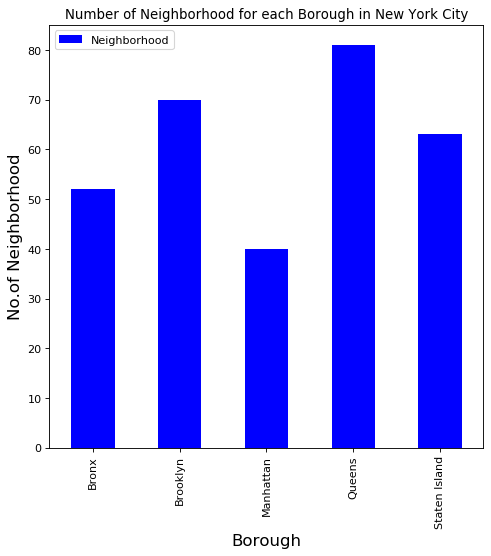

In [290]:
plt.figure(figsize=(7,7), dpi = 80)
# title
plt.title('Number of Neighborhood for each Borough in New York City')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Neighborhood', fontsize=15)
#giving a bar plot
df_ny.groupby('Borough')['Neighborhood'].count().plot(kind='bar', color='#0000FF')
#legend
plt.legend()
#displays the plot
plt.show()

In [291]:
def geo_location(address):
    # get geo location of address
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude

In [292]:
# @hidden_cell
CLIENT_ID = 'NJGKPK25R4VFF5WHBEGHHC5ZXY5IBRBZNMCXGLRVAFUCR35X' # your Foursquare ID
CLIENT_SECRET = 'JB3WXHNYMQBMKTNMYJPC4GCQFCVK1IYMD0VSLHVZSROWFMY1' # your Foursquare Secret
VERSION = '20200706' # Foursquare API version

In [293]:
def get_venues(lat,lng):
    
    #set variables
    radius=1000
    LIMIT=100
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryID{}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT,
            '4bf58dd8d48988d1cc941735')
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
        
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [294]:
def get_venue_details(venue_id):
        
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
        
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

*Let's use the sample neighorhood, Financial District, if there are steakhouses in that area.*

In [295]:
vns = get_venues(40.707107,-74.010665)
vns[vns['Category']=='Steakhouse']

KeyError: 'groups'

In [296]:
stk_res = vns[vns['Category']=='Steakhouse'].values.tolist()
stk_res

[['3fd66200f964a520e6e81ee3', "Delmonico's", 'Steakhouse'],
 ['4ab27744f964a520486b20e3', "Harry's Cafe and Steak", 'Steakhouse'],
 ['51cac19e498e1f28926b8a8d', "Morton's The Steakhouse", 'Steakhouse']]

In [297]:
len(vns[vns['Category']=='Steakhouse'].values.tolist()) > 0

True

In [298]:
for row in df_ny.values.tolist():
    print(row)

['Bronx', 'Wakefield', 40.89470517661, -73.84720052054902]
['Bronx', 'Co-op City', 40.87429419303012, -73.82993910812398]
['Bronx', 'Eastchester', 40.887555677350775, -73.82780644716412]
['Bronx', 'Fieldston', 40.89543742690383, -73.90564259591682]
['Bronx', 'Riverdale', 40.890834493891305, -73.9125854610857]
['Bronx', 'Kingsbridge', 40.88168737120521, -73.90281798724604]
['Manhattan', 'Marble Hill', 40.87655077879964, -73.91065965862981]
['Bronx', 'Woodlawn', 40.89827261213805, -73.86731496814176]
['Bronx', 'Norwood', 40.87722415599446, -73.8793907395681]
['Bronx', 'Williamsbridge', 40.88103887819211, -73.85744642974207]
['Bronx', 'Baychester', 40.866858107252696, -73.83579759808117]
['Bronx', 'Pelham Parkway', 40.85741349808865, -73.85475564017999]
['Bronx', 'City Island', 40.84724670491813, -73.78648845267413]
['Bronx', 'Bedford Park', 40.870185164975325, -73.8855121841913]
['Bronx', 'University Heights', 40.85572707719664, -73.9104159619131]
['Bronx', 'Morris Heights', 40.847897926

In [299]:
# prepare neighborhood list that contains Steakhouse
column_names=['Borough', 'Neighborhood', 'ID','Name']
steak_rest_ny=pd.DataFrame(columns=column_names)

print('Steakhouse in\n---------------------')
       
for row in df_ny.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    steak_restaurants=venues[venues['Category']=='Steakhouse']
    if len(steak_restaurants) > 0:
        print(Neighborhood+', '+Borough+' : '+str(len(steak_restaurants)))
    for restaurant_detail in steak_restaurants.values.tolist():
        id, name , category=restaurant_detail
        steak_rest_ny = steak_rest_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)

print('Completed constructing the Steakhouse data set')

Steakhouse in
---------------------


KeyError: 'groups'

In [218]:
steak_rest_ny.head()

,Borough,Neighborhood,ID,Name
0,Bronx,Wakefield,4eee2538e3002155944863d2,233 Meat Market
1,Bronx,Fieldston,46e6f285f964a520c94a1fe3,Jake’s Steakhouse
2,Bronx,Kingsbridge,4dfe40df8877333e195b68fc,Parrilla Latina
3,Manhattan,Marble Hill,4dfe40df8877333e195b68fc,Parrilla Latina
4,Bronx,Woodlawn,4eee2538e3002155944863d2,233 Meat Market


In [219]:
steak_rest_ny.shape

(49, 4)

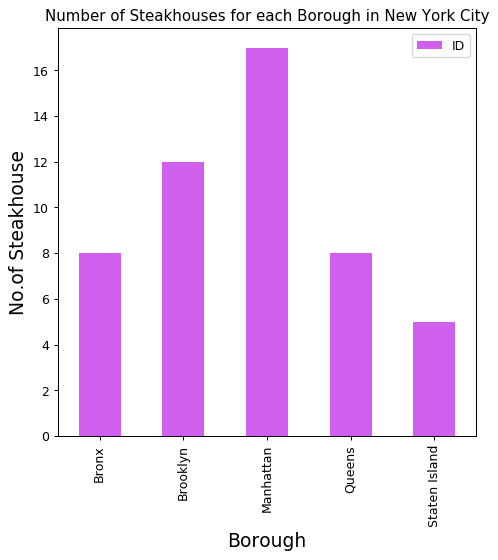

In [136]:
plt.figure(figsize=(6,6), dpi = 90)
# title
plt.title('Number of Steakhouses for each Borough in New York City')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Steakhouse', fontsize=15)
#giving a bar plot
steak_rest_ny.groupby('Borough')['ID'].count().plot(kind='bar', color='#D15FEE')
#legend
plt.legend()
#displays the plot
plt.show()

In [137]:
# prepare neighborhood list that contains steakhouse
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
steak_rest_stats_ny=pd.DataFrame(columns=column_names)
count=1


for row in steak_rest_ny.values.tolist():
    Borough,Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',ID)
        # we will assign 0 value for these resturants as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(steak_rest_ny),')','processed')
    steak_rest_stats_ny = steak_rest_stats_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1

Empty DataFrame
Columns: [ID, Name, Likes, Rating, Tips]
Index: []
No data available for id= 4eee2538e3002155944863d2
( 1 / 50 ) processed
                         ID               Name  Likes  Rating  Tips
0  46e6f285f964a520c94a1fe3  Jake’s Steakhouse     64     7.9    29
( 2 / 50 ) processed
                         ID             Name  Likes  Rating  Tips
0  4dfe40df8877333e195b68fc  Parrilla Latina      8     6.8     6
( 3 / 50 ) processed
                         ID             Name  Likes  Rating  Tips
0  4dfe40df8877333e195b68fc  Parrilla Latina      8     6.8     6
( 4 / 50 ) processed
Empty DataFrame
Columns: [ID, Name, Likes, Rating, Tips]
Index: []
No data available for id= 4eee2538e3002155944863d2
( 5 / 50 ) processed
                         ID                Name  Likes  Rating  Tips
0  560afe74498ec5e1b97a21a1  Outback Steakhouse     19     7.1     1
( 6 / 50 ) processed
                         ID       Name  Likes  Rating  Tips
0  4c0fd7a6f1b6a593b1ee7a27  NYY STEAK  

In [138]:
steak_rest_stats_ny.head()

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
0,Bronx,Wakefield,0,0,0,0,0
1,Bronx,Fieldston,46e6f285f964a520c94a1fe3,Jake’s Steakhouse,64,7.9,29
2,Bronx,Kingsbridge,4dfe40df8877333e195b68fc,Parrilla Latina,8,6.8,6
3,Manhattan,Marble Hill,4dfe40df8877333e195b68fc,Parrilla Latina,8,6.8,6
4,Bronx,Woodlawn,0,0,0,0,0


In [164]:
steak_rest_ny.to_csv('steak_rest_ny.csv', index=False)

In [165]:
steak_rest_ny_csv=pd.read_csv('steak_rest_ny.csv')

In [166]:
steak_rest_ny_csv.head()

,Borough,Neighborhood,ID,Name
0,Bronx,Wakefield,4eee2538e3002155944863d2,233 Meat Market
1,Bronx,Fieldston,46e6f285f964a520c94a1fe3,Jake’s Steakhouse
2,Bronx,Kingsbridge,4dfe40df8877333e195b68fc,Parrilla Latina
3,Manhattan,Marble Hill,4dfe40df8877333e195b68fc,Parrilla Latina
4,Bronx,Woodlawn,4eee2538e3002155944863d2,233 Meat Market


In [167]:
steak_rest_stats_ny.shape

(50, 7)

In [168]:
steak_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Borough       50 non-null     object 
 1   Neighborhood  50 non-null     object 
 2   ID            50 non-null     object 
 3   Name          50 non-null     object 
 4   Likes         50 non-null     float64
 5   Rating        50 non-null     float64
 6   Tips          50 non-null     float64
dtypes: float64(3), object(4)
memory usage: 2.9+ KB


In [169]:
convert_types = {'Likes': float,'Rating': float,'Tips': float}
steak_rest_stats_ny = steak_rest_stats_ny.astype(convert_types)
steak_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Borough       50 non-null     object 
 1   Neighborhood  50 non-null     object 
 2   ID            50 non-null     object 
 3   Name          50 non-null     object 
 4   Likes         50 non-null     float64
 5   Rating        50 non-null     float64
 6   Tips          50 non-null     float64
dtypes: float64(3), object(4)
memory usage: 2.9+ KB


In [170]:
steak_rest_stats_ny.iloc[steak_rest_stats_ny['Likes'].idxmax()]

Borough                         Brooklyn
Neighborhood                Williamsburg
ID              3fd66200f964a5209beb1ee3
Name             Peter Luger Steak House
Likes                               1955
Rating                               8.7
Tips                                 676
Name: 11, dtype: object

In [171]:
steak_rest_stats_ny.iloc[steak_rest_stats_ny['Rating'].idxmax()]

Borough                        Manhattan
Neighborhood                West Village
ID              585164b77220e62219c9aeb6
Name                 4 Charles Prime Rib
Likes                                217
Rating                               9.3
Tips                                  57
Name: 31, dtype: object

In [172]:
steak_rest_stats_ny.iloc[steak_rest_stats_ny['Tips'].idxmax()]

Borough                         Brooklyn
Neighborhood                Williamsburg
ID              3fd66200f964a5209beb1ee3
Name             Peter Luger Steak House
Likes                               1955
Rating                               8.7
Tips                                 676
Name: 11, dtype: object

In [173]:
ny_borough_stats=steak_rest_stats_ny.groupby('Borough',as_index=False).mean()[['Borough','Rating']]
ny_borough_stats.columns=['Borough','Average Rating']

In [174]:
ny_borough_stats.sort_values(['Average Rating'],ascending=False).head()

,Borough,Average Rating
2,Manhattan,8.482353
1,Brooklyn,7.758333
4,Staten Island,6.920000
3,Queens,6.625000
0,Bronx,5.550000


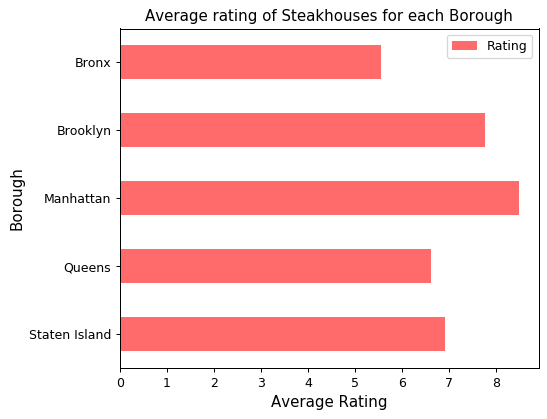

In [175]:
plt.figure(figsize=(6,5), dpi = 90)
# title
plt.title('Average rating of Steakhouses for each Borough')
#On x-axis
plt.ylabel('Borough', fontsize = 12)
#On y-axis
plt.xlabel('Average Rating', fontsize=12)
#giving a bar plot
steak_rest_stats_ny.groupby('Borough').mean()['Rating'].plot(kind='barh', color='#FF6A6A')
#legend
plt.legend()
#displays the plot
plt.gca().invert_yaxis()
plt.show()

In [176]:
ny_neighborhood_stats=steak_rest_stats_ny.groupby('Neighborhood',as_index=False).mean()[['Neighborhood','Rating']]
ny_neighborhood_stats.columns=['Neighborhood','Average Rating']

In [177]:
ny_neighborhood_stats=ny_neighborhood_stats[ny_neighborhood_stats['Average Rating']>=8.5]

In [178]:
ny_neighborhood_stats

,Neighborhood,Average Rating
5,Bayside,8.500000
8,East Harlem,8.600000
20,Midtown,8.733333
22,Murray Hill,8.700000
26,Rockaway Park,8.700000
28,South Side,8.700000
36,West Village,9.050000
37,Williamsburg,8.700000


In [179]:
ny_neighborhood_stats=pd.merge(ny_neighborhood_stats,df_ny, on='Neighborhood')

In [180]:
ny_neighborhood_stats=ny_neighborhood_stats[['Borough','Neighborhood','Latitude','Longitude','Average Rating']]

In [181]:
ny_neighborhood_stats

,Borough,Neighborhood,Latitude,Longitude,Average Rating
0,Queens,Bayside,40.766041,-73.774274,8.500000
1,Manhattan,East Harlem,40.792249,-73.944182,8.600000
2,Manhattan,Midtown,40.754691,-73.981669,8.733333
3,Manhattan,Murray Hill,40.748303,-73.978332,8.700000
4,Queens,Murray Hill,40.764126,-73.812763,8.700000
5,Queens,Rockaway Park,40.580343,-73.841534,8.700000
6,Brooklyn,South Side,40.710861,-73.958001,8.700000
7,Manhattan,West Village,40.734434,-74.006180,9.050000
8,Brooklyn,Williamsburg,40.707144,-73.958115,8.700000


In [182]:
# create map and display it
ny_map = folium.Map(location=geo_location('New York'), zoom_start=12)

In [183]:
incidents = folium.map.FeatureGroup()

for lat, lng, in ny_neighborhood_stats[['Latitude','Longitude']].values:
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=10, # define how big you want the circle markers to be
            color='#EA1253',
            fill=True,
            fill_color='#12EA92',
            fill_opacity=0.4
        )
    )

In [184]:
ny_neighborhood_stats['Label']=ny_neighborhood_stats['Neighborhood']+', '+ny_neighborhood_stats['Borough']+'('+ny_neighborhood_stats['Average Rating'].map(str)+')'

In [185]:
# add pop-up text to each marker on the map
for lat, lng, label in ny_neighborhood_stats[['Latitude','Longitude','Label']].values:
    folium.Marker([lat, lng], popup=label).add_to(ny_map)        
# add incidents to map
ny_map.add_child(incidents)

In [160]:
ny_map = folium.Map(location=geo_location('New York'), zoom_start=11)
ny_geo = r'geo-boundaries.json'

ny_map.choropleth(
    geo_data=ny_geo,
    data=ny_borough_stats,
    columns=['Borough', 'Average Rating'],
    key_on='feature.properties.boro_name',
    fill_color='YlGnBu',
    fill_opacity=0.6, 
    line_opacity=0.4,
    legend_name='Average Rating'
)


FileNotFoundError: [Errno 2] No such file or directory: 'geo-boundaries.json'